In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from collections import namedtuple
from sklearn.preprocessing import Binarizer

In [2]:
# Data sets
train_data = pd.read_csv("C:/Users/MAYANK/Downloads/dataset/titanic/train.csv")
test_data = pd.read_csv("C:/Users/MAYANK/Downloads/dataset/titanic/test.csv")

In [3]:
# Print the entries of the Titanic data
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [7]:
# Feature Engineering
def nan_padding(data, columns):
    for column in columns:
        imputer=Imputer()
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data

nan_columns = ["Age", "SibSp", "Parch"]

train_data = nan_padding(train_data, nan_columns)
test_data = nan_padding(test_data, nan_columns)

In [15]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0.0,0.0
1,3,female,47.0,1.0,0.0
2,2,male,62.0,0.0,0.0
3,3,male,27.0,0.0,0.0
4,3,female,22.0,1.0,1.0


In [10]:
#save PassengerId for evaluation
test_passenger_id=test_data["PassengerId"]

In [11]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [14]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1.0,0.0
1,1,1,female,38.0,1.0,0.0
2,1,3,female,26.0,0.0,0.0
3,1,1,female,35.0,1.0,0.0
4,0,3,male,35.0,0.0,0.0


In [16]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data

In [17]:
dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [18]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0.0,0.0,0,0,1
1,female,47.0,1.0,0.0,0,0,1
2,male,62.0,0.0,0.0,0,1,0
3,male,27.0,0.0,0.0,0,0,1
4,female,22.0,1.0,1.0,0,0,1


In [20]:
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

In [21]:
train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)

In [22]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1.0,0.0,0,0,1
1,1,0,38.0,1.0,0.0,1,0,0
2,1,0,26.0,0.0,0.0,0,0,1
3,1,0,35.0,1.0,0.0,1,0,0
4,0,1,35.0,0.0,0.0,0,0,1


In [24]:
def normalize_age(data):
    scaler = MinMaxScaler()
    data["Age"] = scaler.fit_transform(data["Age"].values.reshape(-1,1))
    return data

In [25]:
train_data = normalize_age(train_data)
test_data = normalize_age(test_data)

In [27]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,0.271174,1.0,0.0,0,0,1
1,1,0,0.472229,1.0,0.0,1,0,0
2,1,0,0.321438,0.0,0.0,0,0,1
3,1,0,0.434531,1.0,0.0,1,0,0
4,0,1,0.434531,0.0,0.0,0,0,1


In [29]:
def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("train_y content:{}".format(train_y[:3]))

print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))

train_x:(712, 7)
train_y:(712, 1)
train_y content:[[1]
 [0]
 [0]]
valid_x:(179, 7)
valid_y:(179, 1)


In [32]:
# Build Neural Network
def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Export the nodes 
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

model = build_neural_network()

In [33]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [34]:
epochs = 200
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }

            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "C:/Users/MAYANK/Downloads/dataset/titanic/titanic.ckpt")

Epoch: 3/200 Train Loss: 0.5548 Train Acc: 0.7163
Epoch: 3/200 Validation Loss: 0.5995 Validation Acc: 0.6480
Epoch: 5/200 Train Loss: 0.4605 Train Acc: 0.8020
Epoch: 5/200 Validation Loss: 0.5185 Validation Acc: 0.7374
Epoch: 7/200 Train Loss: 0.4303 Train Acc: 0.8216
Epoch: 7/200 Validation Loss: 0.4634 Validation Acc: 0.7933
Epoch: 10/200 Train Loss: 0.4217 Train Acc: 0.8146
Epoch: 10/200 Validation Loss: 0.4369 Validation Acc: 0.7877
Epoch: 12/200 Train Loss: 0.4173 Train Acc: 0.8132
Epoch: 12/200 Validation Loss: 0.4247 Validation Acc: 0.7821
Epoch: 14/200 Train Loss: 0.4147 Train Acc: 0.8146
Epoch: 14/200 Validation Loss: 0.4188 Validation Acc: 0.7765
Epoch: 16/200 Train Loss: 0.4122 Train Acc: 0.8174
Epoch: 16/200 Validation Loss: 0.4149 Validation Acc: 0.7821
Epoch: 19/200 Train Loss: 0.4106 Train Acc: 0.8188
Epoch: 19/200 Validation Loss: 0.4125 Validation Acc: 0.7933
Epoch: 21/200 Train Loss: 0.4095 Train Acc: 0.8216
Epoch: 21/200 Validation Loss: 0.4118 Validation Acc: 0.793

Epoch: 169/200 Train Loss: 0.3695 Train Acc: 0.8343
Epoch: 169/200 Validation Loss: 0.4971 Validation Acc: 0.8268
Epoch: 171/200 Train Loss: 0.3693 Train Acc: 0.8329
Epoch: 171/200 Validation Loss: 0.4896 Validation Acc: 0.8212
Epoch: 173/200 Train Loss: 0.3691 Train Acc: 0.8329
Epoch: 173/200 Validation Loss: 0.4824 Validation Acc: 0.8156
Epoch: 175/200 Train Loss: 0.3687 Train Acc: 0.8329
Epoch: 175/200 Validation Loss: 0.4854 Validation Acc: 0.8268
Epoch: 178/200 Train Loss: 0.3683 Train Acc: 0.8371
Epoch: 178/200 Validation Loss: 0.4987 Validation Acc: 0.8101
Epoch: 180/200 Train Loss: 0.3680 Train Acc: 0.8371
Epoch: 180/200 Validation Loss: 0.4947 Validation Acc: 0.8045
Epoch: 182/200 Train Loss: 0.3678 Train Acc: 0.8357
Epoch: 182/200 Validation Loss: 0.4916 Validation Acc: 0.8268
Epoch: 185/200 Train Loss: 0.3675 Train Acc: 0.8371
Epoch: 185/200 Validation Loss: 0.4923 Validation Acc: 0.8212
Epoch: 187/200 Train Loss: 0.3673 Train Acc: 0.8371
Epoch: 187/200 Validation Loss: 0.48

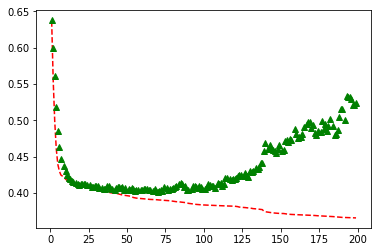

In [35]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

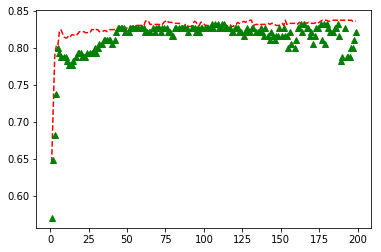

In [36]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [37]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"C:/Users/MAYANK/Downloads/dataset/titanic/titanic.ckpt")
    feed={
        model.inputs:test_data,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[:10]

INFO:tensorflow:Restoring parameters from C:/Users/MAYANK/Downloads/dataset/titanic/titanic.ckpt


array([[ 0.11323167],
       [ 0.15553094],
       [ 0.05967294],
       [ 0.12029156],
       [ 0.54060483],
       [ 0.0830948 ],
       [ 0.57898194],
       [ 0.11057869],
       [ 0.5162797 ],
       [ 0.11234292]], dtype=float32)

In [39]:
binarizer=Binarizer(0.5)
test_predict_result=binarizer.fit_transform(test_predict)
test_predict_result=test_predict_result.astype(np.int32)
test_predict_result[:10]

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0]])

In [42]:
passenger_id=test_passenger_id.copy()
evaluation=passenger_id.to_frame()
evaluation["Survived"]=test_predict_result
evaluation[:100]

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [43]:
#Any files you save will be available in the output tab below
evaluation.to_csv("C:/Users/MAYANK/Downloads/dataset/titanic/evaluation_submission.csv",index=False)